# Time Series | Forecast | Exponential Smoothing | Hold Winter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", ConvergenceWarning)

from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## Data

In [2]:
df = pd.read_csv ('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],
                  index_col= 'date')
df.head() 

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


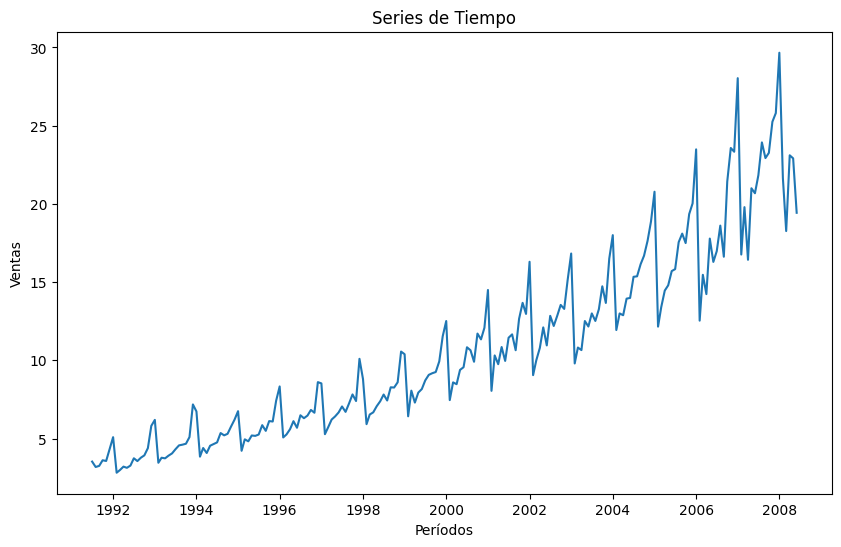

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['value'])

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

## Suavización Exponencial | Método de Holt | StatsModels

In [4]:
# Forecast 
mod_es = SimpleExpSmoothing(df['value']).fit(optimized=True)
df["ES"] = mod_es.fittedvalues
pred_es = mod_es.forecast(30)
expo_s = pd.concat([df["ES"], pred_es])

# Holt
mod_holt = Holt(df['value']).fit(optimized=True)
df["Holt"] = mod_holt.fittedvalues
pred_holt = mod_holt.forecast(30)
expo_holt = pd.concat([df['Holt'], pred_holt])

In [5]:
print(f"MSE ES: {MSE(df['value'], df['ES'])}")
print(f"MSE ES: {MAPE(df['value'], df['ES'])}")
print("------")
print(f"MSE Holt: {MSE(df['value'], df['Holt'])}")
print(f"MSE Holt: {MAPE(df['value'], df['Holt'])}")

MSE ES: 4.024955370218677
MSE ES: 0.13194162718805003
------
MSE Holt: 3.8650137482839977
MSE Holt: 0.13650105882024458


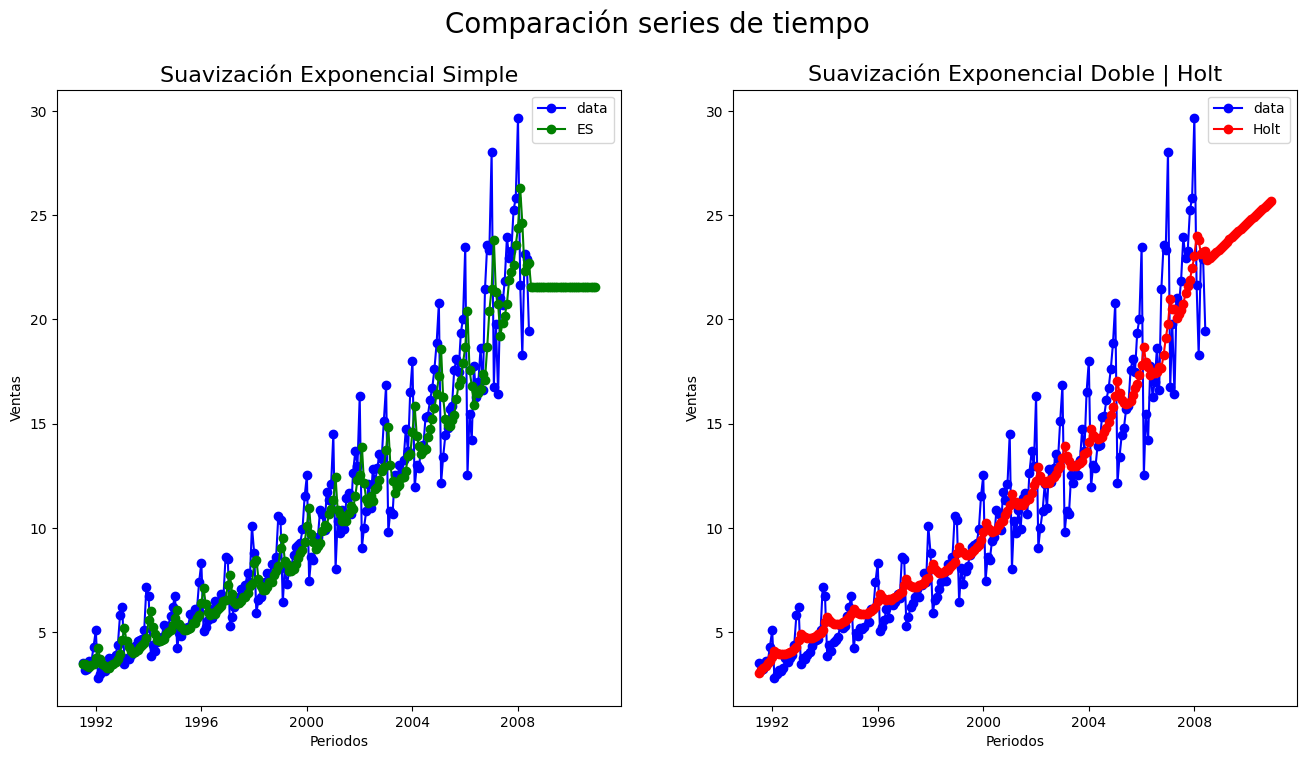

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparación series de tiempo', fontsize=20)

ax1.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax1.plot(expo_s, marker='o', color='green', label='ES')
ax1.set_title('Suavización Exponencial Simple', fontsize=16)
ax1.set(xlabel='Periodos', ylabel='Ventas')
ax1.legend(loc='best')

ax2.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax2.plot(expo_holt, marker='o', color='red', label='Holt')
ax2.set_title('Suavización Exponencial Doble | Holt', fontsize=16)
ax2.set(xlabel='Periodos', ylabel='Ventas')
ax2.legend(loc='best')

## Suavización Exponencial | Holt Winter | Stats Models

Determinar estacionalidad | Método Holt | StatsModel

Text(0, 0.5, 'Demanda')

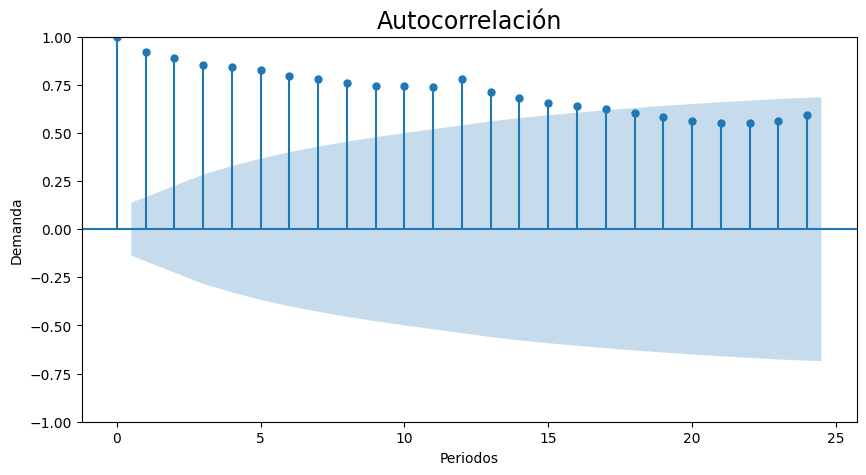

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc('figure', figsize=(10,5))
plot_acf(df['value'].values, fft=1)

plt.title('Autocorrelación', fontsize=17)
plt.xlabel('Periodos')
plt.ylabel('Demanda')

Aplicar Holt Winter 

In [12]:
mod_w = ExponentialSmoothing(df['value'], seasonal_periods=12, trend='add', seasonal='add').fit(optimized=1)
df['winter'] = mod_w.fittedvalues
pred_w = mod_w.forecast(30)
expo_w = pd.concat([df['winter'], pred_w])

In [13]:
mod_w.params_formatted

,name,param,optimized
smoothing_level,alpha,0.152128,True
smoothing_trend,beta,0.046689,True
smoothing_seasonal,gamma,0.468723,True
initial_level,l.0,3.221606,True
initial_trend,b.0,0.052800,True
initial_seasons.0,s.0,0.046900,True
initial_seasons.1,s.1,-0.130667,True
initial_seasons.2,s.2,-0.099533,True
initial_seasons.3,s.3,0.118671,True
initial_seasons.4,s.4,0.240183,True


In [14]:
print(f"MSE ES: {MSE(df['value'], df['ES'])}")
print(f"MSE ES: {MAPE(df['value'], df['ES'])}")
print("------")
print(f"MSE Holt: {MSE(df['value'], df['Holt'])}")
print(f"MSE Holt: {MAPE(df['value'], df['Holt'])}")
print("------")
print(f"MSE winter: {MSE(df['value'], df['winter'])}")
print(f"MSE winter: {MAPE(df['value'], df['winter'])}")

MSE ES: 4.024955370218677
MSE ES: 0.13194162718805003
------
MSE Holt: 3.8650137482839977
MSE Holt: 0.13650105882024458
------
MSE winter: 0.8424796204740733
MSE winter: 0.05018454954142515


como podemos notar el error es mucho más bajo

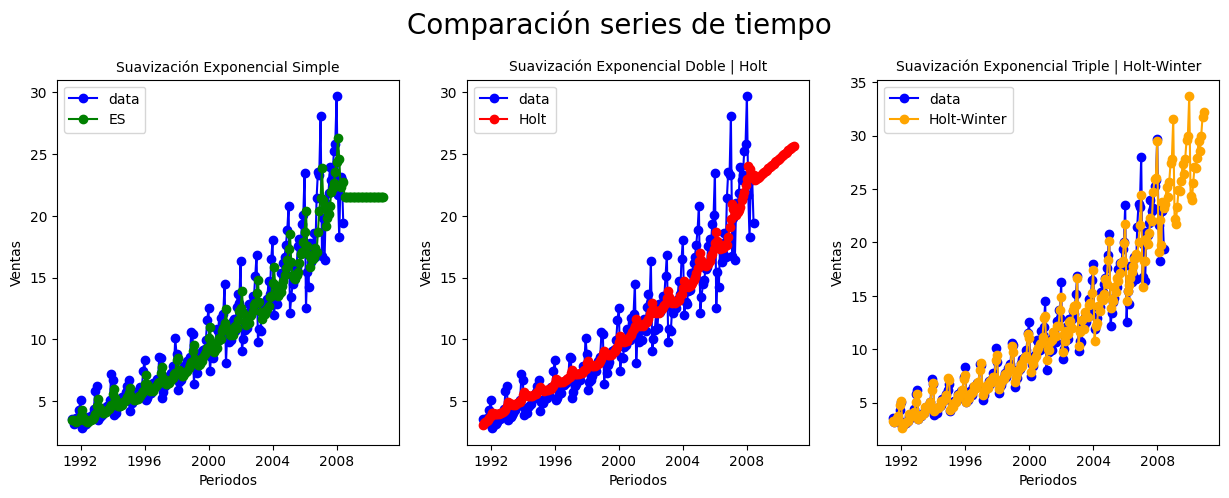

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparación series de tiempo', fontsize=20)

ax1.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax1.plot(expo_s, marker='o', color='green', label='ES')
ax1.set_title('Suavización Exponencial Simple', fontsize=10)
ax1.set(xlabel='Periodos', ylabel='Ventas')
ax1.legend(loc='best')

ax2.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax2.plot(expo_holt, marker='o', color='red', label='Holt')
ax2.set_title('Suavización Exponencial Doble | Holt', fontsize=10)
ax2.set(xlabel='Periodos', ylabel='Ventas')
ax2.legend(loc='best')

ax3.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax3.plot(expo_w, marker='o', color='orange', label='Holt-Winter')
ax3.set_title('Suavización Exponencial Triple | Holt-Winter', fontsize=10)
ax3.set(xlabel='Periodos', ylabel='Ventas')
ax3.legend(loc='best')

plt.subplots_adjust(top=0.84)
plt.show()

La suavicación exponencial con em método holt-winter tiene mejor ajuste 

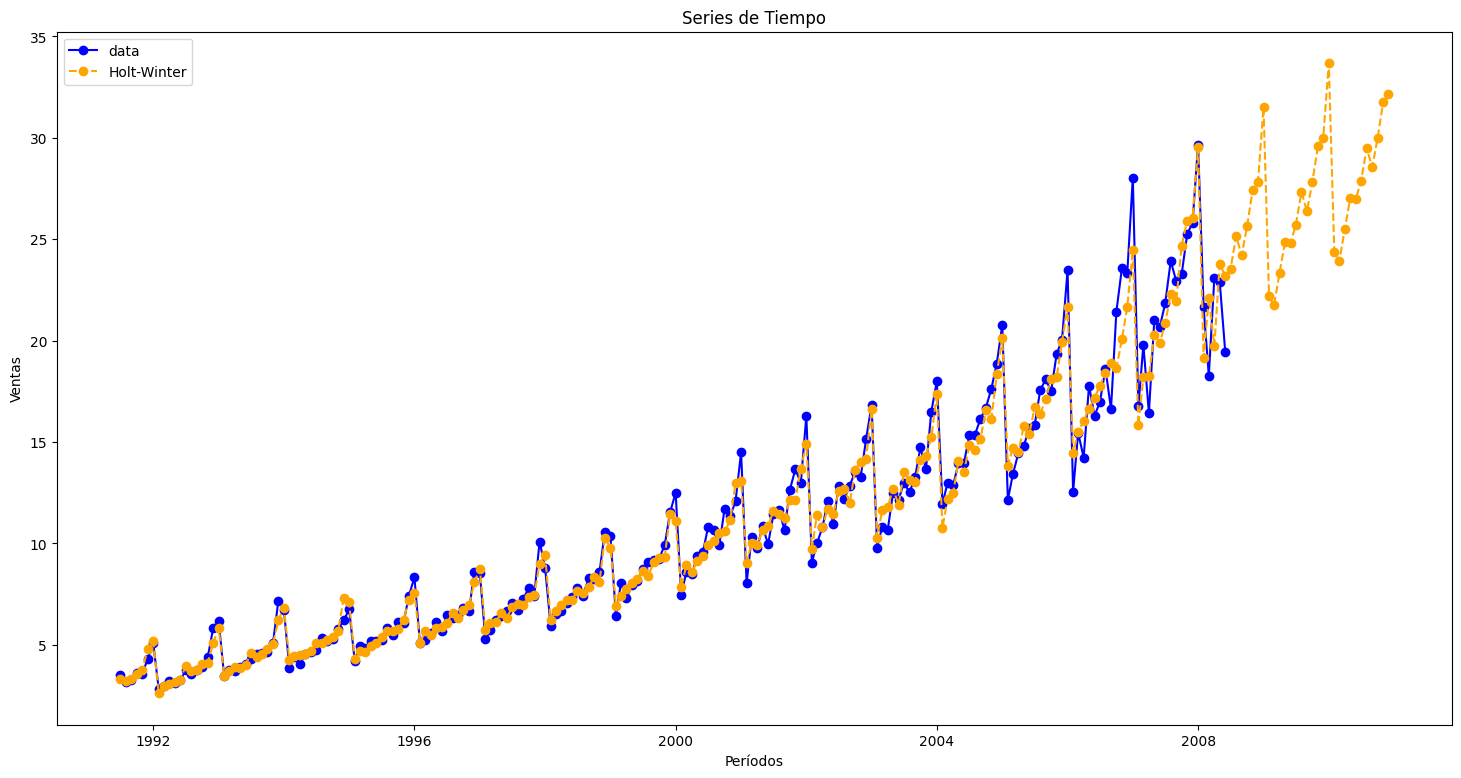

In [22]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df['value'], '-o', color='blue', label='data')
plt.plot(expo_w, '--o', color='orange', label='Holt-Winter')

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()